DEBUG:commons:version: 6.2.4 *
DEBUG:typing:version: 6.2.3
DEBUG:geometry:PyGeometry-z6 version 2.1.4 path /home/be107/DTSimulation/lib/python3.6/site-packages
/home/be107/DTSimulation/lib/python3.6/site-packages/geometry/utils/numpy_backport.py:9: DeprecationWarning: Importing from numpy.testing.utils is deprecated since 1.15.0, import from numpy.testing instead.
  from numpy.testing.utils import assert_allclose  # @UnusedImport
/home/be107/DTSimulation/lib/python3.6/site-packages/gym/utils/seeding.py:64: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  "Function `rng.randint(low, [high, size, dtype])` is marked as deprecated "


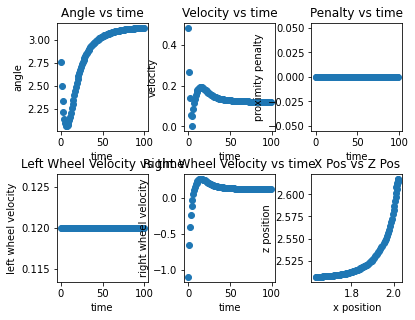

In [1]:
import gym_duckietown
from gym_duckietown.simulator import Simulator
import matplotlib.pyplot as plt
import numpy as np

env = Simulator(
        seed=123, # random seed
        map_name="4way",
        max_steps=500001, # we don't want the gym to reset itself
        domain_rand=0,
        camera_width=640,
        camera_height=480,
        accept_start_angle_deg=1,#at close to straight
        full_transparency=True,
        distortion=True,
    )  

x = []
right_wheel = []
left_wheel = []
angle = []
velocity = []
penalty = []
x_pos = []
z_pos = []
dt = 0

figure, axis = plt.subplots(2, 3)
plt.subplots_adjust(left=0.1, bottom=0.001, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

while dt < 100:
    
    lane_pose = env.get_lane_pos2(env.cur_pos, env.cur_angle)
    distance_to_road_center = lane_pose.dist
    angle_from_straight_in_rads = lane_pose.angle_rad

    ###### Start changing the code here.
    # TODO: Decide how to calculate the speed and direction.

    k_p = 10
    k_d = 1
    
    # The speed is a value between [0, 1] (which corresponds to a real speed between 0m/s and 1.2m/s)
    # If this value is too high it will crash in no time, try to set it to 1.
    speed = 0.1 

    # angle of the steering wheel, which corresponds to the angular velocity in rad/s
    steering = k_p*distance_to_road_center + k_d*angle_from_straight_in_rads # TODO: You should overwrite this value

    ###### No need to edit code below.
    
    obs, reward, done, misc = env.step([speed, steering])
    
    info = misc["Simulator"]
    wheel_vels = info["wheel_velocities"]
    pos = info["cur_pos"]
    
    x.append(dt)
    angle.append(info["cur_angle"])
    velocity.append(info["robot_speed"])
    penalty.append(info["proximity_penalty"])
    x_pos.append(pos[0])
    z_pos.append(pos[2])
    left_wheel.append(wheel_vels[0])
    right_wheel.append(wheel_vels[1])
    
    dt = dt + 1
    
    #env.render()

    if done:
        if reward < 0:
            print('*** CRASHED ***')
        print ('Final Reward = %.3f' % total_reward)
        break

axis[0][0].scatter(x, angle)
axis[0][0].set_title("Angle vs time")
axis[0][0].set_xlabel("time")
axis[0][0].set_ylabel("angle")

axis[0][1].scatter(x, velocity)
axis[0][1].set_title("Velocity vs time")
axis[0][1].set_xlabel("time")
axis[0][1].set_ylabel("velocity")

axis[0][2].scatter(x, penalty)
axis[0][2].set_title("Penalty vs time")
axis[0][2].set_xlabel("time")
axis[0][2].set_ylabel("proximity penalty")

axis[1][0].scatter(x, left_wheel)
axis[1][0].set_title("Left Wheel Velocity vs time")
axis[1][0].set_xlabel("time")
axis[1][0].set_ylabel("left wheel velocity")

axis[1][1].scatter(x, right_wheel)
axis[1][1].set_title("Right Wheel Velocity vs time")
axis[1][1].set_xlabel("time")
axis[1][1].set_ylabel("right wheel velocity")

axis[1][2].scatter(x_pos, z_pos)
axis[1][2].set_title("X Pos vs Z Pos")
axis[1][2].set_xlabel("x position")
axis[1][2].set_ylabel("z position")

#plt.scatter(x, angle, c="blue")
#plt.title("How Angle Changes Over Time")
#plt.xlabel("time")
#plt.ylabel("curr_angle");

plt.show()

In [ ]:
map_name = "Duckietown-udem1-v0"

In [2]:
import gym, gym_duckietown

display = Display(visible=0, size=(1400, 900))
display.start()

env = gym.make(map_name)

"""
env = DuckietownEnv(
    map_name=map_name,
    draw_curve="store_true",
    draw_bbox="store_true",
    domain_rand="store_true",
    accept_start_angle_deg=4, 
)"""


env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(10):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)

NameError: name 'Display' is not defined